In [107]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [108]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

qosf-task3

In [109]:
# oracle: make |1001> and |1100> negative
def oracle (nqubits):
    qc = QuantumCircuit(nqubits)
    qc.cz(3,2) # 1, control, target
    qc.toffoli(3,0,2) # 2, control, control, target
    qc.mct([3,1,0], 2) # 3, multi-toffoli
    # 4, CCCZ, multi-control z, place on the target
    qc.h(0)
    qc.mct([3,2,1], 0)
    qc.h(0)

    qc.mct([3,2,1], 0) # 5, multi-toffoli

    # 6, CCCZ, multi-control z, place on the target
    qc.h(0)
    qc.mct([3,2,1], 0)
    qc.h(0)
 
    U_w = qc.to_gate()
    U_w.name = "U$_\omega$"
    return U_w 

In [110]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)

    for qubit in range(nqubits):
        qc.h(qubit)

    for qubit in range(nqubits):
        qc.x(qubit)
    
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1) 
    qc.h(nqubits-1)

    for qubit in range(nqubits):
        qc.x(qubit)

    for qubit in range(nqubits):
        qc.h(qubit)

    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

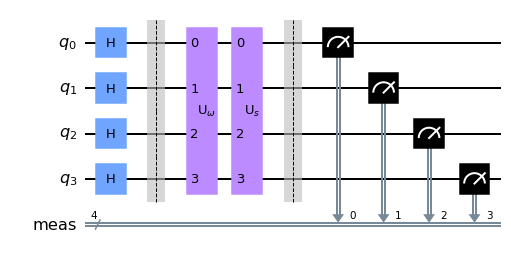

In [111]:
n = 4
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2,3])
grover_circuit.barrier()
grover_circuit.append(oracle(n), [0,1,2,3])
grover_circuit.append(diffuser(n), [0,1,2,3])

grover_circuit.measure_all()
grover_circuit.draw()

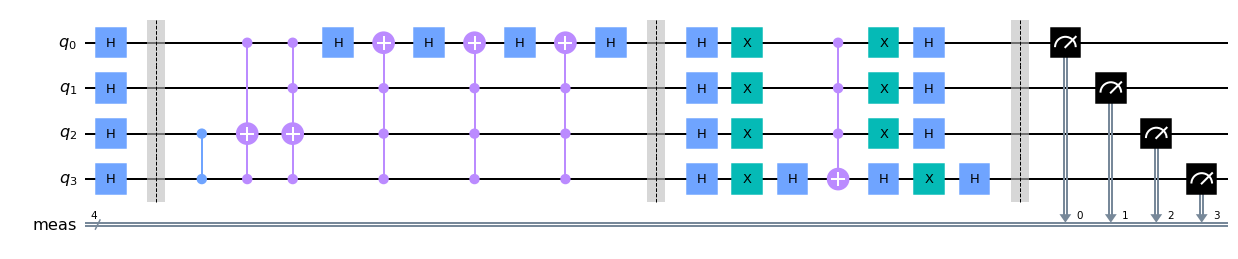

In [112]:
n = 4
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2,3])
grover_circuit.barrier()

###
# grover_circuit.append(oracle(n), [0,1,2,3])
grover_circuit.cz(3,2) # 1, control, target
grover_circuit.toffoli(3,0,2) # 2, control, control, target
grover_circuit.mct([3,1,0], 2) # 3, multi-toffoli
# 4, CCCZ, multi-control z, place on the target
grover_circuit.h(0)
grover_circuit.mct([3,2,1], 0)
grover_circuit.h(0)

grover_circuit.mct([3,2,1], 0) # 5, multi-toffoli

# 6, CCCZ, multi-control z, place on the target
grover_circuit.h(0)
grover_circuit.mct([3,2,1], 0)
grover_circuit.h(0)

grover_circuit.barrier()
###

###
# grover_circuit.append(diffuser(n), [0,1,2,3])
for qubit in range(n):
    grover_circuit.h(qubit)

for qubit in range(n):
    grover_circuit.x(qubit)

# Do multi-controlled-Z gate
grover_circuit.h(n-1)
grover_circuit.mct(list(range(n-1)), n-1) 
grover_circuit.h(n-1)

for qubit in range(n):
    grover_circuit.x(qubit)

for qubit in range(n):
    grover_circuit.h(qubit)
###

grover_circuit.measure_all()
grover_circuit.draw()

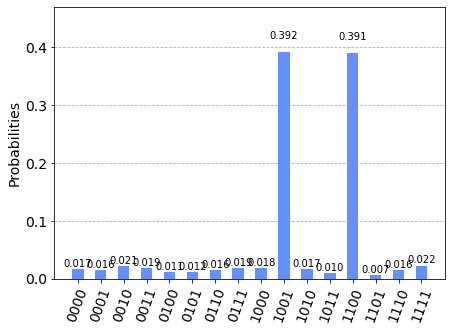

In [113]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)